# アブストラクトの評価指標に関する分析

### 目的

- 良い論文と悪い論文の間で評価指標（rule1 ~ rule31）の差を分析。
- 2 グループ間の有意差を検証。


## データの読み込み


In [6]:
# 必要なライブラリをインポート
import os
import pandas as pd
from functions import load_data, preprocess_data, calculate_ztest, visualize_results

In [7]:
# パスの設定
data_dir = "../../data/results/combined"
graph_save_dir = "../../data/results/graphs"
data_save_dir = "../../data/results/metrics"

In [8]:
# データ読み込み
high_group, low_group = load_data(data_dir)

## データの分析


データを保存しました: ../../data/results/metrics/Overall_results.csv
グラフを保存しました: ../../data/results/graphs/Overall_ztest_visualization.png


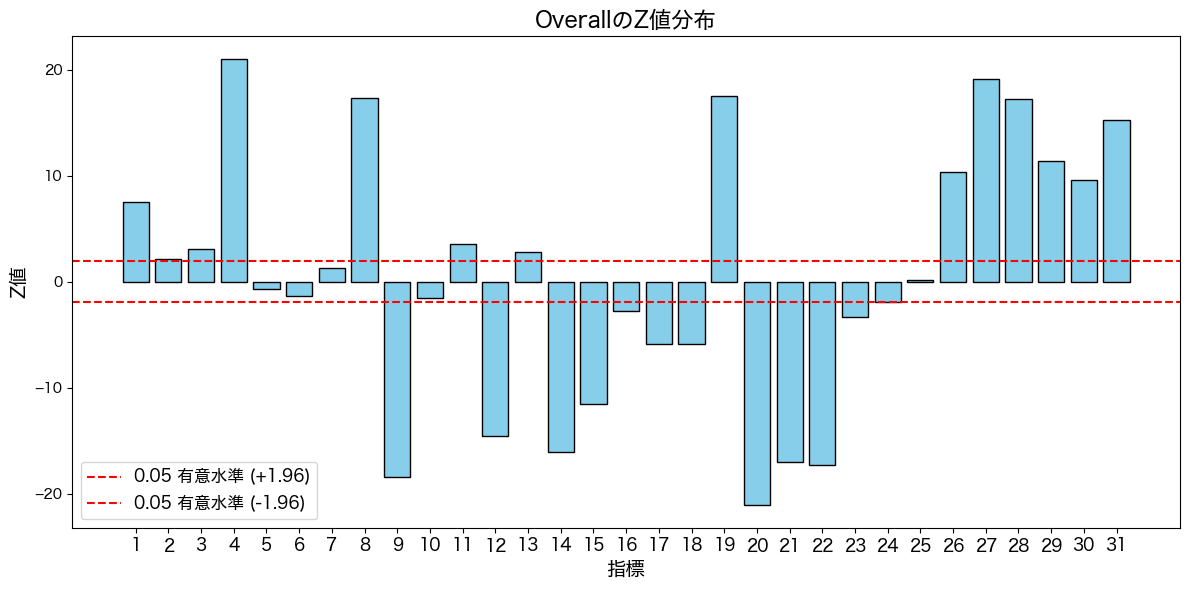

--- Biochemistry_Molecular_Biology の処理を開始 ---


NameError: name 'output_dir_graphs' is not defined

In [9]:
# ルールリスト
rules = [f'rule{i}' for i in range(1, 32)]

# 全体の比較
all_high_df = preprocess_data(pd.concat(high_group.values()))
all_low_df = preprocess_data(pd.concat(low_group.values()))

# Z検定（全体）
all_results_df = calculate_ztest(all_high_df, all_low_df, rules)
visualize_results(all_results_df, graph_save_dir, data_save_dir, "Overall")

# 各分野ごとの比較
for field in high_group.keys():
    print(f"--- {field} の処理を開始 ---")
    
    # データ前処理
    high_df = preprocess_data(high_group[field])
    low_df = preprocess_data(low_group[field])
    
    # Z検定
    results_df = calculate_ztest(high_df, low_df, rules)
    
    # 可視化と保存
    visualize_results(results_df, graph_save_dir, data_save_dir, field)
    print(f"{field} の処理が完了しました。")
